<a href="https://colab.research.google.com/github/beeetea/ttareungi_visualization/blob/master/bike_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.metrics import adjusted_mutual_info_score, normalized_mutual_info_score
from google.colab import files

In [0]:
#files.upload()
path = "/content"# use your path
all_files = []
all_files = glob.glob(path + "/*.csv")

t1 = pd.read_csv(all_files[0], encoding="CP949")
# t2 = pd.read_csv(all_files[1], encoding="CP949")
t3 = pd.read_csv(all_files[2], encoding="CP949")
t4 = pd.read_csv(all_files[3], encoding="CP949")

df = pd.concat([t1, t3, t4], axis=0)

In [0]:
df.head(5)

,'자전거번호','대여일시','대여대여소번호','대여대여소명','대여거치대','반납일시','반납대여소번호','반납대여소명','반납거치대','이용시간(분)','이용거리(M)'
0,'SPB-15882','2018-04-01 00:00:01','266',' 영등포청과시장 사거리',9,'2018-04-01 00:07:39','245',' 삼성생명 당산사옥 앞',1,7,1390
1,'SPB-06226','2018-04-01 00:00:16','1946',' 구로역 광장',1,'2018-04-01 00:44:38','1820',' 신한은행 시흥대로금융센터지점',1,44,9170
2,'SPB-03366','2018-04-01 00:00:17','1449',' 상봉역 1번출구',14,'2018-04-01 00:42:56','1433',' 중화역 2번출구',6,42,4700
3,'SPB-12878','2018-04-01 00:00:20','2034',' 사당역 7번출구쪽',18,'2018-04-01 00:34:22','2032',' 이수역 11번출구쪽',5,32,5430
4,'SPB-14075','2018-04-01 00:00:23','141',' 연대 대운동장 옆',15,'2018-04-01 00:10:59','172',' 서대문소방서',1,10,1960


In [0]:
from_uos = df[df["'대여대여소번호'"].isin(["'616'", "'623'", "'638'", "'639'"])] # 대여장소가 UOS인 df
to_uos = df[df["'반납대여소번호'"].isin(["'616'", "'623'", "'638'", "'639'"])] # 반납장소가 UOS인 df

In [0]:
from_uos.head(5)


,'자전거번호','대여일시','대여대여소번호','대여대여소명','대여거치대','반납일시','반납대여소번호','반납대여소명','반납거치대','이용시간(분)','이용거리(M)'
164,'SPB-08779','2018-04-01 00:11:50','623',' 서울시립대 정문 앞',1,'2018-04-01 00:26:50','628',' 휘봉고등학교 앞',13,13,2410
455,'SPB-12671','2018-04-01 00:31:44','639',' 서울시립대 후문',11,'2018-04-01 00:37:36','622',' 전농사거리 교통섬',15,5,1530
545,'SPB-15927','2018-04-01 00:40:13','638',' 서울시립대 정보기술관',17,'2018-04-01 01:15:57','622',' 전농사거리 교통섬',12,35,8850
900,'SPB-11457','2018-04-01 01:13:06','638',' 서울시립대 정보기술관',14,'2018-04-01 01:20:13','623',' 서울시립대 정문 앞',17,7,950
957,'SPB-02283','2018-04-01 01:17:27','638',' 서울시립대 정보기술관',18,'2018-04-01 01:52:46','638',' 서울시립대 정보기술관',16,34,1510


In [0]:
to_uos.head(5)

,'자전거번호','대여일시','대여대여소번호','대여대여소명','대여거치대','반납일시','반납대여소번호','반납대여소명','반납거치대','이용시간(분)','이용거리(M)'
213,'SPB-12898','2018-04-01 00:14:51','512',' 뚝섬역 1번 출구 옆',9,'2018-04-01 00:47:28','616',' 서울시립대 앞',16,32,5000
438,'SPB-15476','2018-04-01 00:30:15','1611',' 과기대 입구(우)',4,'2018-04-01 01:07:37','616',' 서울시립대 앞',1,36,7130
501,'SPB-14077','2018-04-01 00:35:45','634',' 외국어대 정문 앞',1,'2018-04-01 01:50:33','623',' 서울시립대 정문 앞',2,74,11800
726,'SPB-16064','2018-04-01 00:57:40','382',' 약수역 10번출구 앞',2,'2018-04-01 01:33:25','639',' 서울시립대 후문',13,35,7790
900,'SPB-11457','2018-04-01 01:13:06','638',' 서울시립대 정보기술관',14,'2018-04-01 01:20:13','623',' 서울시립대 정문 앞',17,7,950


In [0]:
from_time = pd.DataFrame(from_uos["'대여일시'"].str.split('-').str[2].str[3:5].astype('float') + (1/60)*from_uos["'대여일시'"].str.split('-').str[2].str[6:8].astype('float'))
from_time.rename(columns={"'대여일시'":"'time'"}, inplace=True)
from_uos = from_uos.join(from_time)

In [0]:
from_uos.head(5)

,'자전거번호','대여일시','대여대여소번호','대여대여소명','대여거치대','반납일시','반납대여소번호','반납대여소명','반납거치대','이용시간(분)','이용거리(M)','time'
32,'SPB-06700','2018-06-01 00:01:20','623',' 서울시립대 정문 앞',2,'2018-06-01 00:14:04','617',' 청솔우성아파트 앞',1,12,1890,0.016667
127,'SPB-10223','2018-05-01 00:06:52','639',' 서울시립대 후문',10,'2018-05-01 00:15:37','616',' 서울시립대 앞',1,8,870,0.100000
164,'SPB-08779','2018-04-01 00:11:50','623',' 서울시립대 정문 앞',1,'2018-04-01 00:26:50','628',' 휘봉고등학교 앞',13,13,2410,0.183333
164,'SPB-08779','2018-04-01 00:11:50','623',' 서울시립대 정문 앞',1,'2018-04-01 00:26:50','628',' 휘봉고등학교 앞',13,13,2410,0.100000
164,'SPB-04867','2018-06-01 00:06:47','623',' 서울시립대 정문 앞',7,'2018-06-01 00:18:30','634',' 외국어대 정문 앞',15,11,1760,0.183333


In [0]:
to_time = pd.DataFrame(to_uos["'대여일시'"].str.split('-').str[2].str[3:5].astype('float') + (1/60)*to_uos["'대여일시'"].str.split('-').str[2].str[6:8].astype('float'))
to_time.rename(columns={"'대여일시'":"'time'"}, inplace=True)
to_uos = to_uos.join(to_time)

In [0]:
filt = lambda x : (~(x["'대여대여소번호'"].isin(["'616'", "'623'", "'638'", "'639'"]) & x["'반납대여소번호'"].isin(["'616'", "'623'", "'638'", "'639'"])))

from_uos = from_uos[filt]
to_uos = to_uos[filt]

In [0]:
from_uos.head(5)

,'자전거번호','대여일시','대여대여소번호','대여대여소명','대여거치대','반납일시','반납대여소번호','반납대여소명','반납거치대','이용시간(분)','이용거리(M)','time'
32,'SPB-06700','2018-06-01 00:01:20','623',' 서울시립대 정문 앞',2,'2018-06-01 00:14:04','617',' 청솔우성아파트 앞',1,12,1890,0.016667
164,'SPB-08779','2018-04-01 00:11:50','623',' 서울시립대 정문 앞',1,'2018-04-01 00:26:50','628',' 휘봉고등학교 앞',13,13,2410,0.183333
164,'SPB-08779','2018-04-01 00:11:50','623',' 서울시립대 정문 앞',1,'2018-04-01 00:26:50','628',' 휘봉고등학교 앞',13,13,2410,0.100000
164,'SPB-04867','2018-06-01 00:06:47','623',' 서울시립대 정문 앞',7,'2018-06-01 00:18:30','634',' 외국어대 정문 앞',15,11,1760,0.183333
164,'SPB-04867','2018-06-01 00:06:47','623',' 서울시립대 정문 앞',7,'2018-06-01 00:18:30','634',' 외국어대 정문 앞',15,11,1760,0.100000


In [0]:
to_uos.head(5)

,'자전거번호','대여일시','대여대여소번호','대여대여소명','대여거치대','반납일시','반납대여소번호','반납대여소명','반납거치대','이용시간(분)','이용거리(M)','time'
50,'SPB-10869','2018-05-01 00:02:18','1338',' 용문2교 옆',2,'2018-05-01 00:35:29','638',' 서울시립대 정보기술관',3,32,5420,0.033333
213,'SPB-12898','2018-04-01 00:14:51','512',' 뚝섬역 1번 출구 옆',9,'2018-04-01 00:47:28','616',' 서울시립대 앞',16,32,5000,0.233333
250,'SPB-06973','2018-05-01 00:13:12','1447',' 면목역 3번출구',9,'2018-05-01 00:37:27','639',' 서울시립대 후문',7,23,3740,0.216667
411,'SPB-12235','2018-05-01 00:23:31','1308',' 안암로터리 버스정류장 앞',4,'2018-05-01 00:52:40','638',' 서울시립대 정보기술관',1,29,3240,0.383333
438,'SPB-15476','2018-04-01 00:30:15','1611',' 과기대 입구(우)',4,'2018-04-01 01:07:37','616',' 서울시립대 앞',1,36,7130,0.500000


In [0]:
from_set = from_uos[["'time'","'이용시간(분)'"]]
to_set = to_uos[["'time'","'이용시간(분)'"]]

from_set = from_set.reset_index().drop('index', axis=1)
to_set = to_set.reset_index().drop('index', axis=1)

In [0]:
from_set = from_set[from_set["'이용시간(분)'"]< 60]
to_set = to_set[to_set["'이용시간(분)'"]< 60]

In [0]:
from_set.head(5)

,'time','이용시간(분)'
0,0.016667,12
1,0.183333,13
2,0.100000,13
3,0.183333,11
4,0.100000,11


In [0]:
to_set.head(5)

,'time','이용시간(분)'
0,0.033333,32
1,0.233333,32
2,0.216667,23
3,0.383333,29
4,0.500000,36


In [0]:
def SSE(dataSet):
  sse=[]
  for i in range(20,30):
    kmeans=cluster.KMeans(n_clusters=i,n_init=200)
    kmeans.fit(dataSet)
    sse.append(kmeans.inertia_)
    
  plt.plot(range(20,30),sse,marker='o')
  plt.xlabel('클러스터 개수')
  plt.ylabel('SSE')
  plt.show()
   

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

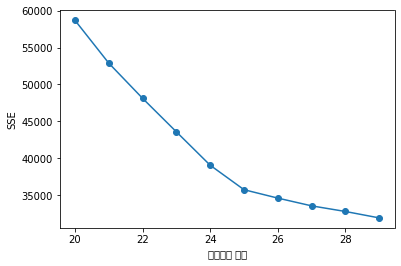

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_

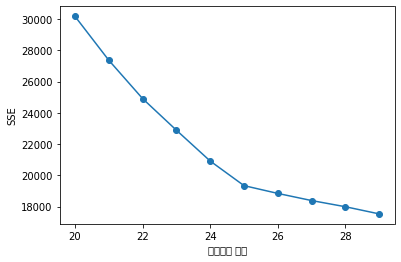

In [0]:
SSE(from_set)
SSE(to_set)

In [0]:
kClusters=25
results_from_set=[]
results_to_set=[]

kmeans=cluster.KMeans(n_clusters=kClusters,n_init=200)

kmeans.fit(from_set)
results_from_set.append(list(kmeans.labels_))
from_set["'K-means'"]=list(kmeans.labels_)
from_set_centers=np.array(kmeans.cluster_centers_)

kmeans.fit(to_set)
results_to_set.append(list(kmeans.labels_))
to_set["'K-means'"]=list(kmeans.labels_)
to_set_centers=np.array(kmeans.cluster_centers_)

print(from_set_centers)
print(to_set_centers)

[[1.79053646e+01 9.92187500e+00 2.10000000e+01]
 [1.70229885e+01 2.92857143e+01 1.50000000e+01]
 [1.36314607e+01 9.81273408e+00 8.00000000e+00]
 [1.86708333e+01 5.49218750e+01 5.00000000e+00]
 [1.55230655e+00 4.67857143e+00 1.20000000e+01]
 [4.10476190e+00 4.35396825e+01 1.30000000e+01]
 [2.09901376e+01 2.55963303e+01 3.00000000e+00]
 [1.08700730e+01 2.54890511e+01 2.20000000e+01]
 [7.79662447e+00 5.21898734e+01 1.80000000e+01]
 [2.18259063e+01 5.67904509e+00 2.00000000e+00]
 [1.67061856e+00 1.04742268e+01 4.00000000e+00]
 [2.14023611e+01 1.87583333e+01 2.30000000e+01]
 [1.71024709e+01 1.52587209e+01 7.00000000e+00]
 [8.26512027e+00 1.07525773e+01 1.40000000e+01]
 [1.92419708e+01 4.11751825e+01 1.00000000e+00]
 [1.11735833e+01 1.69850000e+01 7.10542736e-15]
 [2.21177337e+01 1.15731707e+01 9.00000000e+00]
 [1.74986755e+01 4.74900662e+01 1.90000000e+01]
 [1.04958167e+01 4.99203187e+00 1.70000000e+01]
 [1.66059179e+01 2.15869565e+01 1.60000000e+01]
 [1.74118280e+01 5.02346041e+00 6.000000

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_

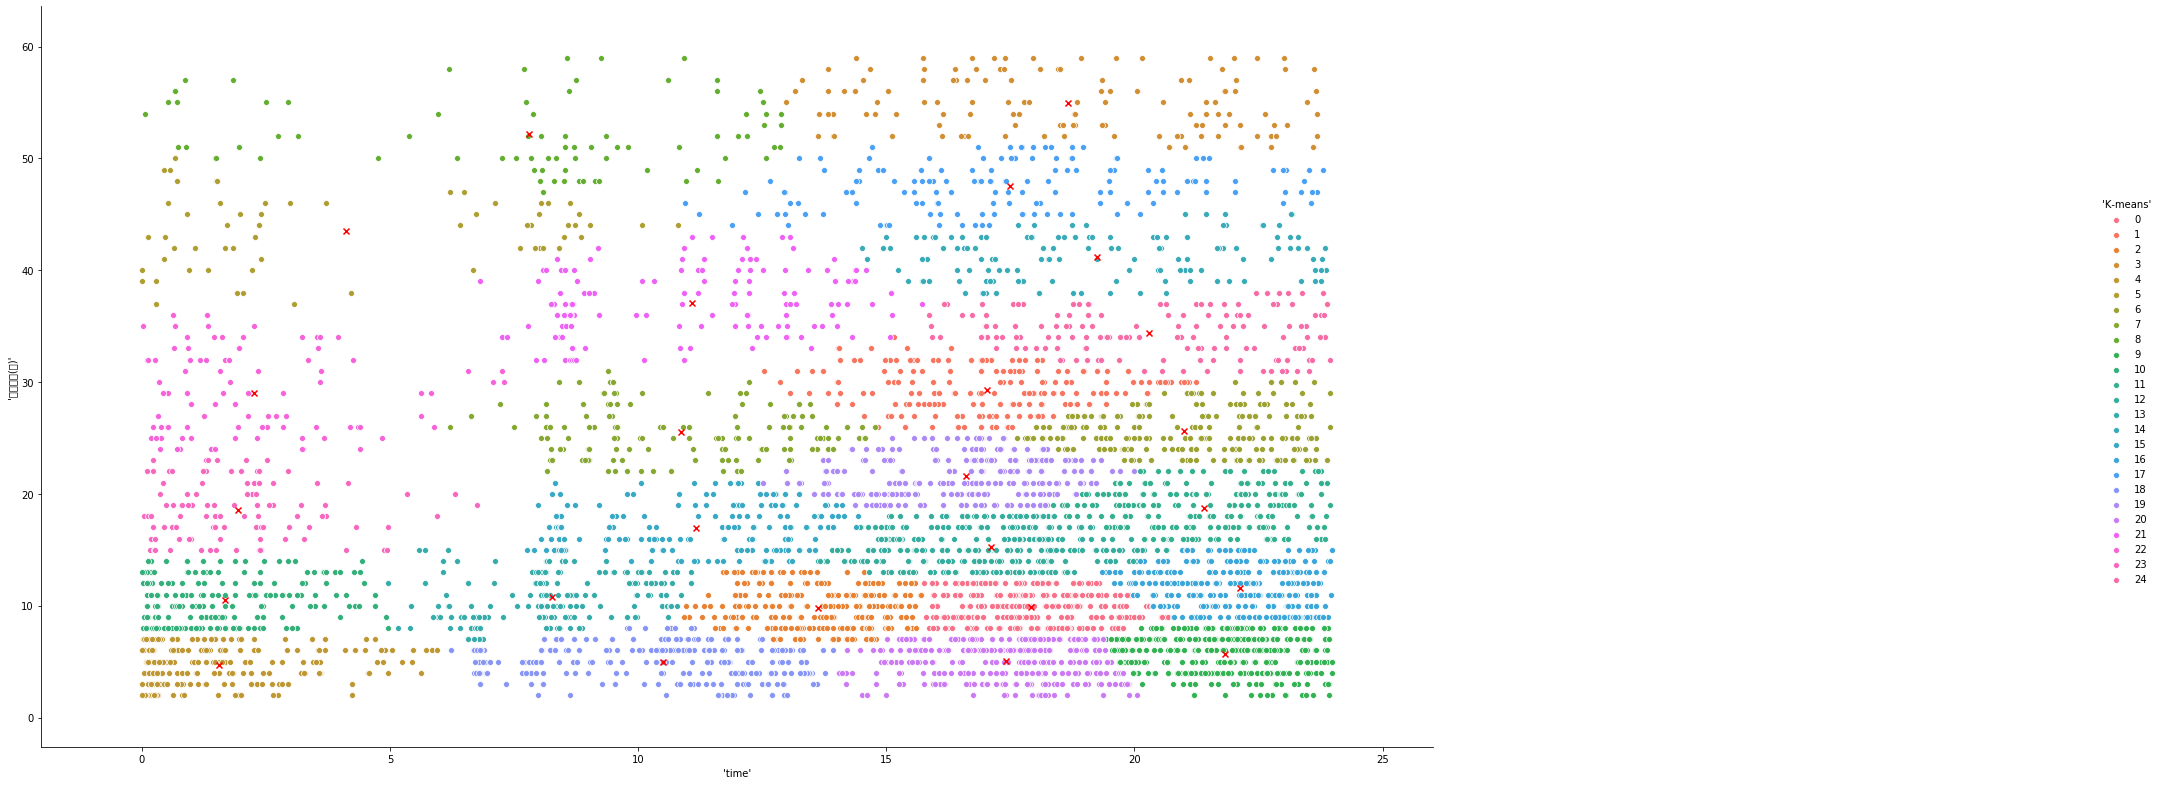

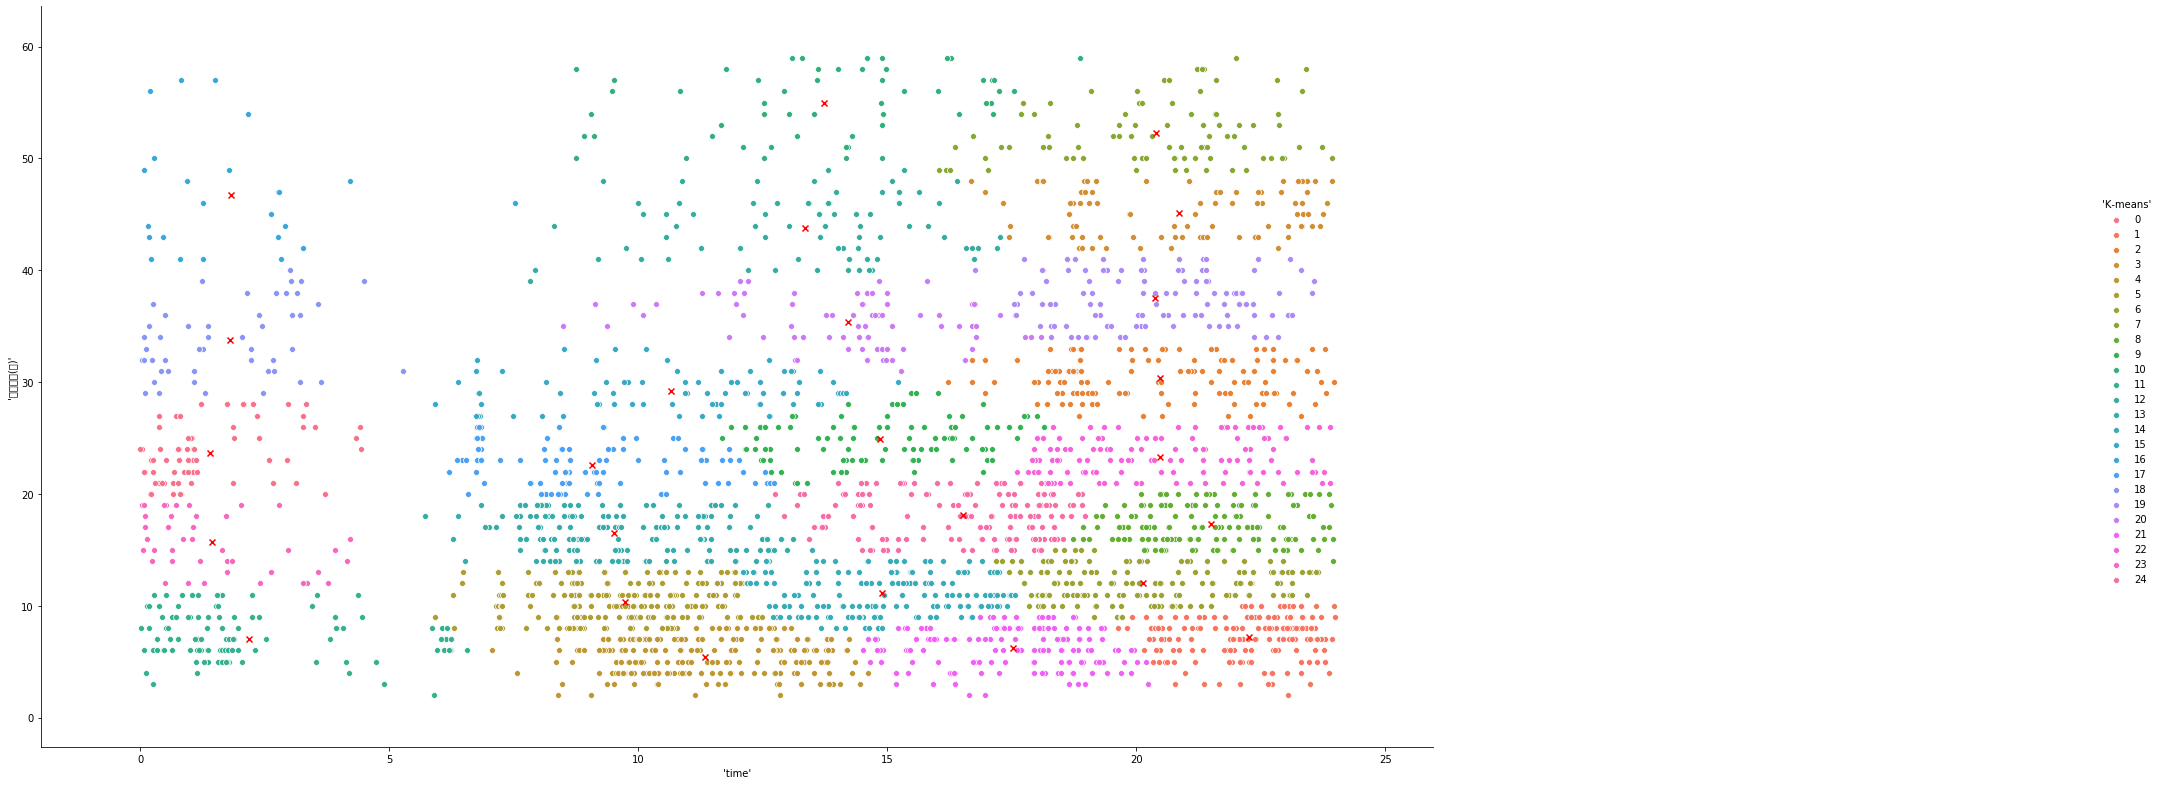

In [0]:
g=sns.pairplot(x_vars=["'time'"],y_vars=["'이용시간(분)'"],data=from_set,hue="'K-means'")
plt.scatter(from_set_centers[:,0],from_set_centers[:,1],marker="x",color='r')
g.fig.set_figheight(15)
g.fig.set_figwidth(40)


g=sns.pairplot(x_vars=["'time'"],y_vars=["'이용시간(분)'"],data=to_set,hue="'K-means'")
plt.scatter(to_set_centers[:,0],to_set_centers[:,1],marker="x",color='r')
g.fig.set_figheight(15)
g.fig.set_figwidth(40)